In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [2]:
figs = os.path.join('../../plots')
file = os.path.join('../../results/raw-results.csv')

df = pd.read_csv(file)

sns.set_context("paper", font_scale=2.8)   
sns.set_style("ticks")

In [3]:
df = df[df['Experiment'] == 'FORK']

<Figure size 432x288 with 0 Axes>

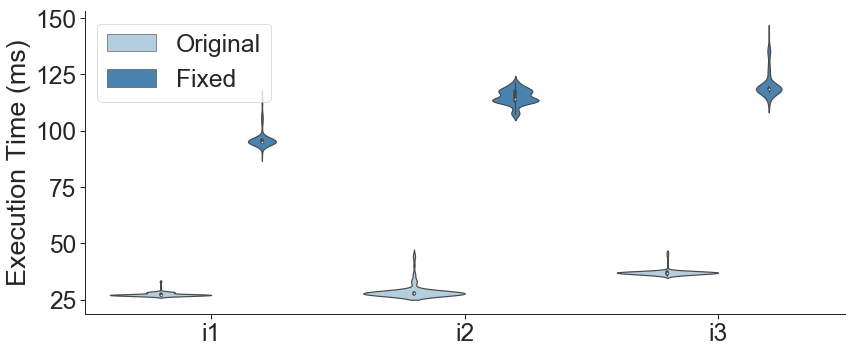

In [4]:
%matplotlib inline
plt.clf()


sns.set_style("ticks")

import math

bench = df.query('Class=="AddPaddingZeros" and Method=="insert"')
bench = bench.sort_values(by='Score')
bench = bench.replace('fixed_full', 'Fixed')
bench = bench.replace('original', 'Original')

#headers_table = pd.pivot_table(data=headers_bench, values='Score', index=['Version','Method', 'Iteration', 'Fork', 'Trial'])
cat = sns.catplot(data=bench, x='Full params', y='Score', hue='Version', 
                  ci=95, kind='violin', sharey=False, legend_out=False, legend=True, aspect=2.4, palette='Blues')
cat.set_axis_labels("", "Execution Time (ms)")
cat.set_xticklabels(['i' + str(i) for i in list(range(1,4))])
cat.set_titles("{col_name}")

#plt.legend(bbox_to_anchor=(-2.3, .95), loc=2, borderaxespad=0.)
plt.legend(loc='best')
#plt.show()
plt.tight_layout()
plt.savefig(os.path.join(figs, 'FORK-pgjdbc-addpaddingzeros.pdf'))